# 机器学习练习 6 - 支持向量机

实验目的：

实验环境

实验内容：使用支持向量机（SVM）来构建垃圾邮件分类器。 我们将从一些简单的2D数据集开始使用SVM来查看它们的工作原理。 然后，我们将对一组原始电子邮件进行一些预处理工作，并使用SVM在处理的电子邮件上构建分类器，以确定它们是否为垃圾邮件。

<img style="float: left;" src="img/svm_model.png">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat

raw_data = loadmat('data/ex6data1.mat')

我们将其用散点图表示，其中类标签由符号表示（+表示正类，o表示负类）。

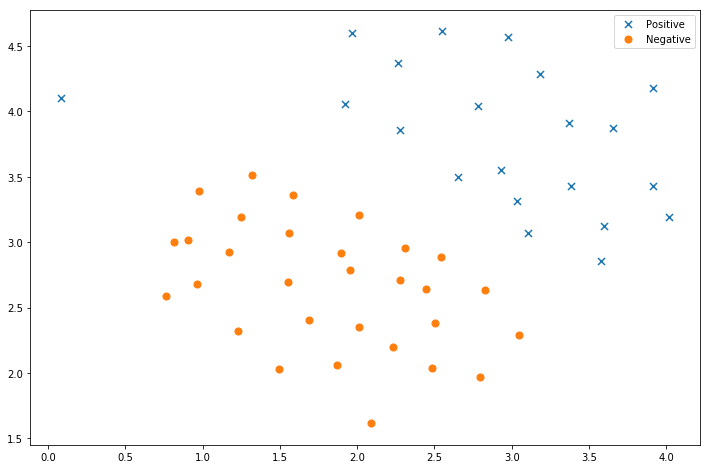

In [2]:
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]


fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')
ax.legend()
plt.show()

请注意，还有一个异常的正例在其他样本之外。
这些类仍然是线性分离的，但它非常紧凑。 我们要训练线性支持向量机来学习类边界。在本次实验中，我们采用scikit-learn机器学习库进行svm分类。

<font color=red size=3> #############请在下面写出基于sklearn的svm.LinearSVC分类代码，并更改C值，总结C值对于分类边界的影响（比如C值分别取1、100），报告训练集的分类准确度，并画出如下图所示的分类边界（可参考下面画图代码）#################### </font>

<img style="float: left;" src="img/svc1.png">

In [20]:
#调用 svm.LinearSVC，并设置C=1，模型命名为svc


其次，让我们看看如果C的值越大，会发生什么

In [5]:
#调用 svm.LinearSVC，并设置C=100，模型命名为svc2




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9803921568627451

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()#Get Current Axes获取当前轴线
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    #if plot_support:
     #   ax.scatter(model.support_vectors_[:, 0],
      #             model.support_vectors_[:, 1],
       #            s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

#来源https://blog.csdn.net/weixin_41376658/article/details/79415192 


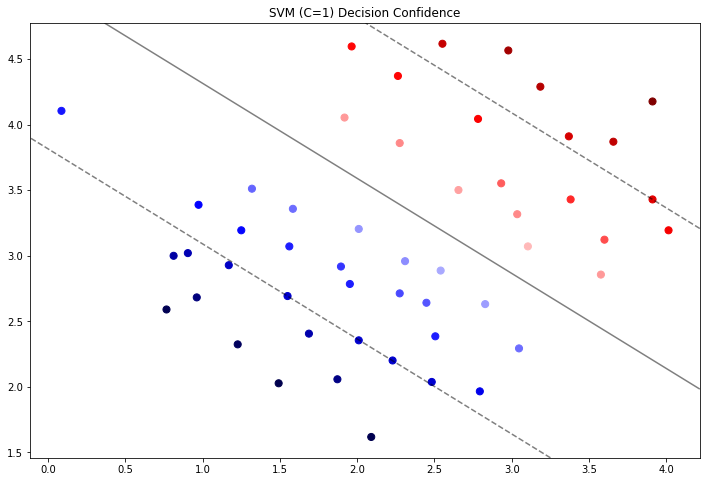

In [7]:
data['SVM 1 Confidence'] = svc.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 1 Confidence'], cmap='seismic')
plot_svc_decision_function(svc,ax);
ax.set_title('SVM (C=1) Decision Confidence')
plt.show()



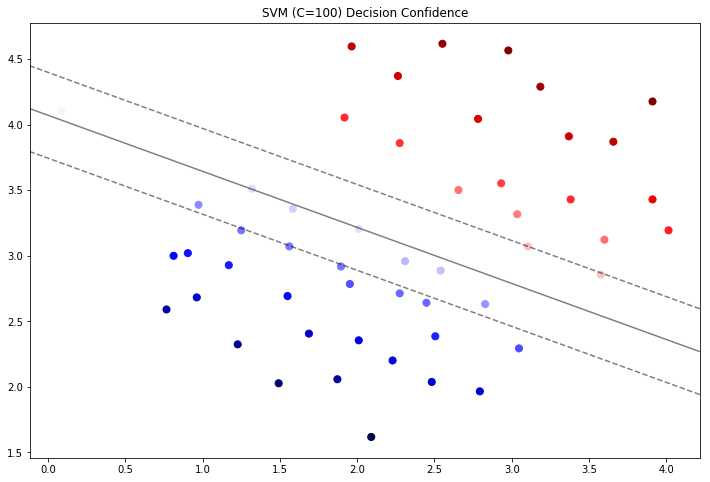

In [8]:
data['SVM 2 Confidence'] = svc2.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 2 Confidence'], cmap='seismic')
plot_svc_decision_function(svc2,ax);
ax.set_title('SVM (C=100) Decision Confidence')
plt.show()

可以看看靠近边界的点的颜色，区别是有点微妙。 如果您在练习文本中，则会出现绘图，其中决策边界在图上显示为一条线，有助于使差异更清晰。
